Titanic Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from numbers import Number
from scipy import stats
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
X = df.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Parch'],axis=1)
df = X

In [170]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000
887,1,1,female,19.0,0,30.0000
888,0,3,female,NaN,1,23.4500
889,1,1,male,26.0,0,30.0000


In [171]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
print(df['Sex'].unique())
df

[1 0]


,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000
887,1,1,0,19.0,0,30.0000
888,0,3,0,NaN,1,23.4500
889,1,1,1,26.0,0,30.0000


In [172]:
df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000
887,1,1,0,19.0,0,30.0000
888,0,3,0,NaN,1,23.4500
889,1,1,1,26.0,0,30.0000


In [173]:
df[df['Age'].isnull()].head(1000)

,Survived,Pclass,Sex,Age,SibSp,Fare
5,0,3,1,NaN,0,8.4583
17,1,2,1,NaN,0,13.0000
19,1,3,0,NaN,0,7.2250
26,0,3,1,NaN,0,7.2250
28,1,3,0,NaN,0,7.8792
...,...,...,...,...,...,...
859,0,3,1,NaN,0,7.2292
863,0,3,0,NaN,8,69.5500
868,0,3,1,NaN,0,9.5000
878,0,3,1,NaN,0,7.8958


In [174]:
def myfunc(age, pclass):
    if pd.isnull(age) and pclass==1:
        age=40
    elif pd.isnull(age) and pclass==2:
        age=32
    elif pd.isnull(age) and pclass==3:
        age=25
    else:
        age=age
    return age
df['Age'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass']), axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000
887,1,1,0,19.0,0,30.0000
888,0,3,0,25.0,1,23.4500
889,1,1,1,26.0,0,30.0000


In [175]:
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=30)

In [177]:
model = LogisticRegression()

In [178]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
X_train_prediction = model.predict(X_train)


In [180]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [181]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [182]:

table = pd.crosstab(df['Survived'],df['Sex'])
print(table)

Sex         0    1
Survived          
0          81  468
1         233  109


In [183]:

print(df.groupby('Sex').Survived.mean())

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In [184]:
survivors_gender = df.groupby(['Sex']).size().values
non_survivors_gender = df.groupby(['Sex']).size().values
totals = survivors_gender + non_survivors_gender
print(survivors_gender)
totals

[314 577]


array([ 628, 1154])

Text(0.5, 1.0, '% of survivors by gender')

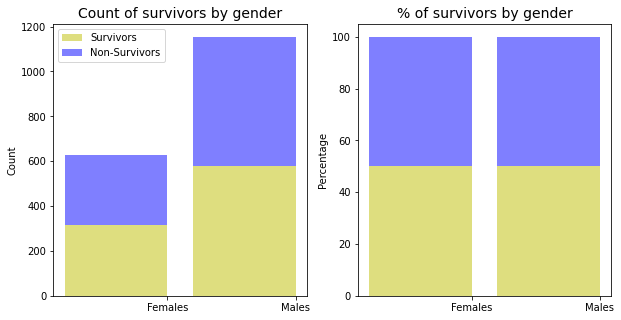

In [195]:
def as_percent(val, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(val, Number):
        return "{{:{}%}}".format(precision).format(val)
    else:
        raise TypeError("Numeric type required")

def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Females', 'Males']
#f, (ax1) = plt.subplots(1, figsize=(10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='y')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='b')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='y')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='b')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)